# Exploratory Data Analysis for SPC Capstone 2

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [3]:
#Data Loading
df = pd.read_pickle('./pkl_files/df_tots.pkl')

In [4]:
df.head()

,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],Current DC [A],PV Cell,Power DC [W],Surface Temperature [ºC],Voltage DC [V]
Datetime,,,,,,,,,,,
2014-01-01 07:41:00+00:00,9.7,7.131149,6.929149,0.751824,0.700000,275.33384,0.195270,A,2.850946,9.4,14.60
2014-01-01 07:42:00+00:00,9.7,7.040442,6.847878,0.781930,0.666667,278.50306,0.130512,B,2.388366,9.7,18.30
2014-01-01 07:42:00+00:00,9.7,7.040442,6.847878,0.781930,0.666667,278.50306,0.072500,A,1.674750,9.4,23.10
2014-01-01 07:43:00+00:00,9.7,6.594407,6.672844,0.813929,0.616667,284.66712,0.075000,A,1.732500,9.4,23.10
2014-01-01 07:43:00+00:00,9.7,6.594407,6.672844,0.813929,0.616667,284.66712,0.052500,B,1.173375,9.7,22.35


In [5]:
df.describe()

,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],Current DC [A],Power DC [W],Surface Temperature [ºC],Voltage DC [V]
count,1.236488e+06,1.236488e+06,1.236488e+06,1.236488e+06,1.236488e+06,1.236488e+06,1.236488e+06,1.236488e+06,1.236488e+06,1.236488e+06
mean,2.087393e+01,4.510952e+02,1.237005e+02,2.740742e+01,2.597943e+00,1.998093e+02,3.573051e+00,9.891582e+01,2.945720e+01,2.693634e+01
std,5.567262e+00,3.170598e+02,9.977101e+01,1.944455e+01,1.314048e+00,8.664973e+01,2.608150e+00,7.205573e+01,9.387964e+00,3.075815e+00
min,3.400000e+00,8.764930e-01,1.591053e+00,5.006730e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+00,1.010000e+01
25%,1.651667e+01,1.581803e+02,5.889961e+01,1.002260e+01,1.633333e+00,1.256611e+02,1.035000e+00,2.740500e+01,2.180000e+01,2.685000e+01
50%,2.090000e+01,4.233756e+02,9.572428e+01,2.441854e+01,2.516667e+00,2.196927e+02,3.335000e+00,9.490838e+01,2.960000e+01,2.755000e+01
75%,2.500000e+01,7.227458e+02,1.557552e+02,4.336762e+01,3.433334e+00,2.678315e+02,6.045000e+00,1.674450e+02,3.690000e+01,2.840000e+01
max,3.830000e+01,1.438887e+03,7.765521e+02,8.426602e+01,1.228333e+01,3.599992e+02,1.023750e+01,3.076369e+02,6.200000e+01,3.690000e+01


In [7]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)


In [8]:
profile.to_widgets()


As expected, strong interaction between current and voltage regarding power; variables are being left in to "test" model prediction (current*voltage = power). Global and diffuse radiation are the strongest correlated variables as well as current, which seems to be much more strongly correlated than voltage to power. 

Let's explore some of the data. Let's look at power in relation to some of the variables. But first, let's just look at a histrogram of Power. 

In [10]:
df.columns

Index(['Ambient Temperature [ºC]', 'Global Radiation [W/m2]',
       'Diffuse Radiation [W/m2]', 'Ultraviolet [W/m2]', 'Wind Velocity [m/s]',
       'Wind Direction [º]', 'Current DC [A]', 'PV Cell', 'Power DC [W]',
       'Surface Temperature [ºC]', 'Voltage DC [V]'],
      dtype='object')

Text(0, 0.5, 'count')

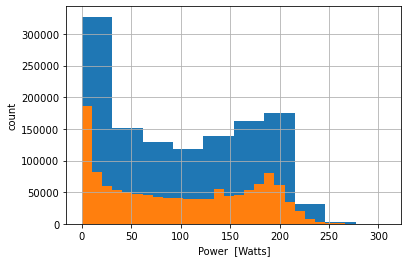

In [44]:
df["Power DC [W]"].hist(bins=10); df["Power DC [W]"].hist(bins=30)
plt.xlabel("Power  [Watts]")
plt.ylabel("count")

Near zero is common. Initial thinking is nighttime. Let's plot near zero power values against time of day. 

In [58]:
ten_df = df[df["Power DC [W]"] <=10]
one_df = df[df["Power DC [W]"] <=1]

In [59]:
ten_df.head()

,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],Current DC [A],PV Cell,Power DC [W],Surface Temperature [ºC],Voltage DC [V]
Datetime,,,,,,,,,,,
2014-01-01 07:41:00+00:00,9.7,7.131149,6.929149,0.751824,0.700000,275.33384,0.195270,A,2.850946,9.4,14.60
2014-01-01 07:42:00+00:00,9.7,7.040442,6.847878,0.781930,0.666667,278.50306,0.130512,B,2.388366,9.7,18.30
2014-01-01 07:42:00+00:00,9.7,7.040442,6.847878,0.781930,0.666667,278.50306,0.072500,A,1.674750,9.4,23.10
2014-01-01 07:43:00+00:00,9.7,6.594407,6.672844,0.813929,0.616667,284.66712,0.075000,A,1.732500,9.4,23.10
2014-01-01 07:43:00+00:00,9.7,6.594407,6.672844,0.813929,0.616667,284.66712,0.052500,B,1.173375,9.7,22.35


In [60]:
one_df.head()

,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],Current DC [A],PV Cell,Power DC [W],Surface Temperature [ºC],Voltage DC [V]
Datetime,,,,,,,,,,,
2014-01-01 07:46:00+00:00,9.700000,7.546620,6.920961,0.926726,0.633333,273.33472,0.0125,B,0.372500,9.8,29.80
2014-01-01 07:47:00+00:00,9.700000,8.045695,7.797984,0.968047,0.583333,281.33312,0.0125,B,0.374375,9.8,29.95
2014-01-01 07:48:00+00:00,9.783334,7.864246,7.420328,1.012543,0.533333,286.16852,0.0100,B,0.301500,9.8,30.15
2014-01-01 07:49:00+00:00,9.800000,8.839786,8.384774,1.059740,0.616667,299.76818,0.0100,B,0.303500,9.8,30.35
2014-01-01 07:50:00+00:00,9.800000,9.199440,8.635354,1.108016,0.716667,327.67166,0.0125,B,0.381250,9.8,30.50


Text(0, 0.5, 'count')

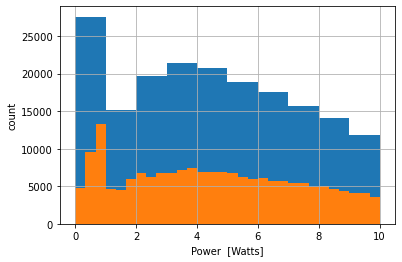

In [42]:
ten_df["Power DC [W]"].hist(bins=10); ten_df["Power DC [W]"].hist(bins=30)
plt.xlabel("Power  [Watts]")
plt.ylabel("count")

TypeError: 'str' object is not callable

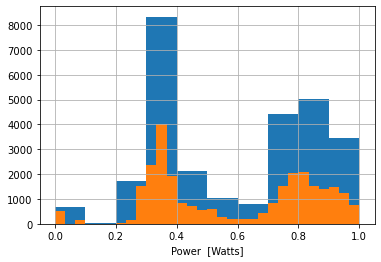

In [61]:
one_df["Power DC [W]"].hist(bins=10); one_df["Power DC [W]"].hist(bins=30)
plt.xlabel("Power  [Watts]")
plt.ylabel("count")

In [62]:
print(one_df.index.time.min(), one_df.index.time.max())

05:20:00 20:00:00


In [63]:
print(df.index.time.min(), df.index.time.max())

05:20:00 20:00:00


In [64]:
one_df['Time'] = one_df.index.time

<ipython-input-64-af84c8c8cbaa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_df['Time'] = one_df.index.time


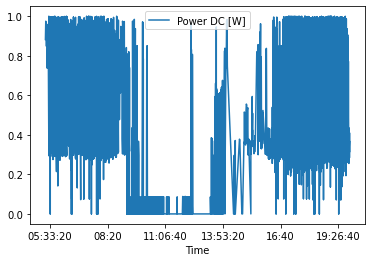

In [65]:
one_df.plot(x='Time', y='Power DC [W]')

In [66]:
ten_df['Time'] = ten_df.index.time

<ipython-input-66-86809519285f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ten_df['Time'] = ten_df.index.time


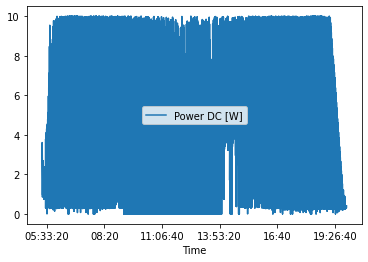

In [67]:
ten_df.plot(x='Time', y='Power DC [W]')

In [68]:
df['Time'] = df.index.time

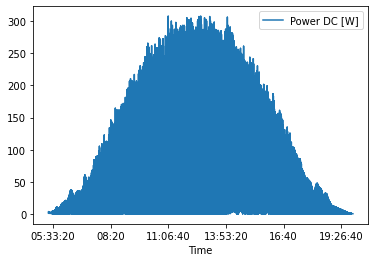

In [69]:
df.plot(x='Time', y='Power DC [W]', )

The last is the only insightful plot. Our  measurments run from 5:33 in the morning to 19:26 in the evening (~7:30 PM at night). January 1: sunrise 7:35 AM and sunset at 5:33 PM. July 15 : 6:24 AM, 8:51 PM. So it's possible the data could run later, but it doesn't seem like (from the plot) much would be gained. 

So lack of low Power in the df is not time dependent, but rather a result of something else. 

In [79]:
#drop time column
df.drop(columns=['Time'], inplace=True)

In [80]:
df.head()

,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],Current DC [A],PV Cell,Power DC [W],Surface Temperature [ºC],Voltage DC [V]
Datetime,,,,,,,,,,,
2014-01-01 07:41:00+00:00,9.7,7.131149,6.929149,0.751824,0.700000,275.33384,0.195270,A,2.850946,9.4,14.60
2014-01-01 07:42:00+00:00,9.7,7.040442,6.847878,0.781930,0.666667,278.50306,0.130512,B,2.388366,9.7,18.30
2014-01-01 07:42:00+00:00,9.7,7.040442,6.847878,0.781930,0.666667,278.50306,0.072500,A,1.674750,9.4,23.10
2014-01-01 07:43:00+00:00,9.7,6.594407,6.672844,0.813929,0.616667,284.66712,0.075000,A,1.732500,9.4,23.10
2014-01-01 07:43:00+00:00,9.7,6.594407,6.672844,0.813929,0.616667,284.66712,0.052500,B,1.173375,9.7,22.35


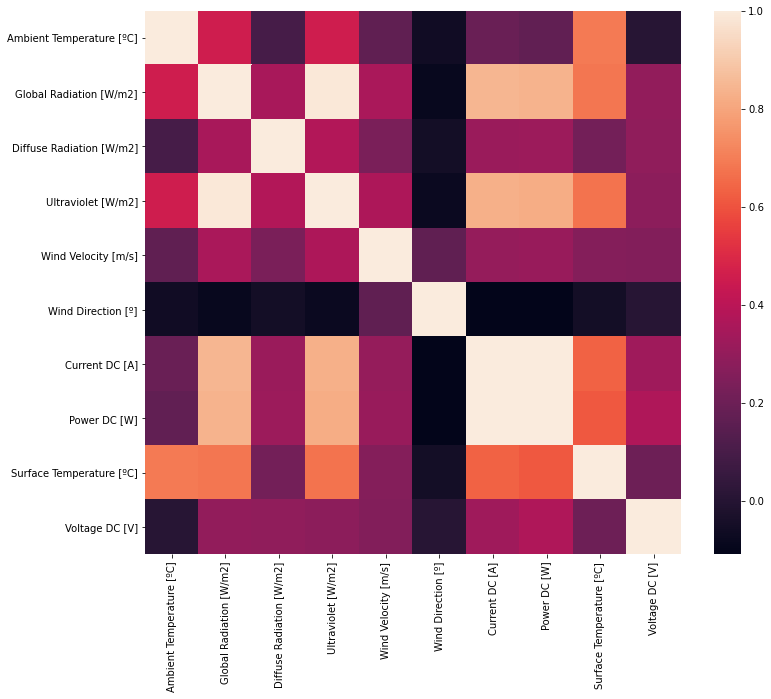

In [81]:
#I know this is above; I just wanted a quick reminder. 
plt.subplots(figsize=(12,10))
sns.heatmap(df.corr());

Now we look at scatter plots of all features in our df against Power.

In [82]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'Power DC [W]', data=df, alpha=0.5)
        ax.set(xlabel=col, ylabel='Power  [Watts]')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [83]:
df.columns

Index(['Ambient Temperature [ºC]', 'Global Radiation [W/m2]',
       'Diffuse Radiation [W/m2]', 'Ultraviolet [W/m2]', 'Wind Velocity [m/s]',
       'Wind Direction [º]', 'Current DC [A]', 'PV Cell', 'Power DC [W]',
       'Surface Temperature [ºC]', 'Voltage DC [V]'],
      dtype='object')

In [86]:
discard = [''Power DC [W]']
features = [i for i in df.columns if i not in discard]

SyntaxError: invalid syntax (<ipython-input-86-aaec3ed97f13>, line 1)

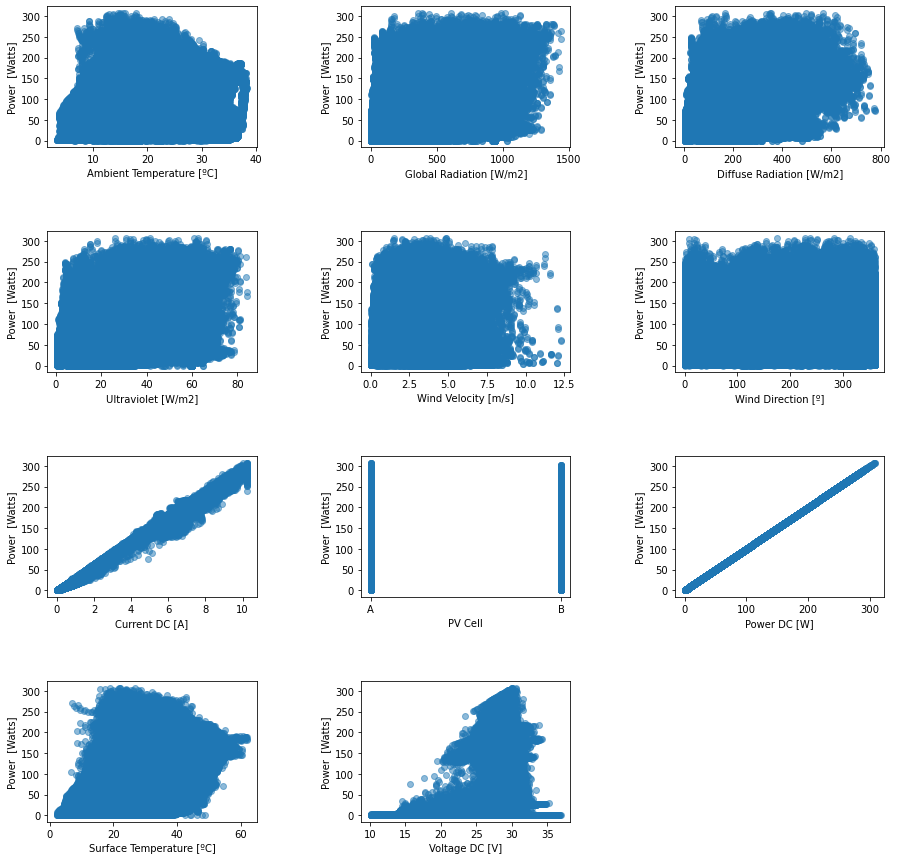

In [88]:
scatterplots(features, ncol=3, figsize=(15, 15))

A couple things. One, there doesn't seem to be much from A/B PV cell types. We see a very strong linear dependence of Power on Current as well as voltage. 

The temp measurement plots are interestering and there's a 0.6 correlation between the two temps. Surface temp is the temp of the PV cell. We may want to discard this column. We'll reassess at model building stage. 

Last note: I wish I had cloud cover data, as well as precipitation and humidity. Looking into if this data is available and how I would obtain it. 

In [ ]:
#Itentially left blank. 

Done right now for the data we have. Below is just an example of weekly plots and daily plots. 

In [93]:
df_dt = df

In [94]:
df_dt['DT'] = df_dt.index

In [95]:
mask_week = (df_dt['DT'] >='2015-03-15') & (df['DT'] <='2015-03-21')

In [96]:
df_week = df_dt.loc[mask_week]

In [97]:
df_week.describe()

,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],Current DC [A],Power DC [W],Surface Temperature [ºC],Voltage DC [V]
count,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000
mean,14.320646,366.525157,141.102139,22.611949,2.393977,171.774287,3.195187,90.229337,22.382921,27.252837
std,1.822066,297.135687,115.027582,16.728914,1.162615,78.455429,2.782522,77.832602,7.693276,3.737372
min,8.566668,5.595198,5.514959,0.868168,0.116667,0.425690,0.025000,0.487500,9.100000,14.000000
25%,13.137500,122.064580,62.285476,8.133847,1.537500,103.429440,0.928125,25.237500,16.300000,27.300000
50%,14.383334,269.900630,96.674588,18.986498,2.366667,170.990320,2.110000,62.237750,19.900000,28.250000
75%,15.800000,616.251720,186.612005,36.086072,3.150000,235.657900,5.557500,158.597344,29.000000,29.400000
max,17.966668,1298.045600,632.937240,63.702244,8.283333,359.633560,10.237500,288.697500,41.000000,31.700000


In [98]:
df_week.nunique()

Ambient Temperature [ºC]     519
Global Radiation [W/m2]     3448
Diffuse Radiation [W/m2]    3448
Ultraviolet [W/m2]          3448
Wind Velocity [m/s]          393
Wind Direction [º]          3446
Current DC [A]              2624
PV Cell                        2
Power DC [W]                6376
Surface Temperature [ºC]     319
Voltage DC [V]               245
Datetime                    3448
DT                          3448
dtype: int64

In [99]:
discard = ['Power DC [W]']
features = [i for i in df_week.columns if i not in discard]

In [133]:
def scatterplots_week(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'Power DC [W]', data=df_week, alpha=0.5)
        ax.set(xlabel=col, ylabel='Power  [Watts]')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

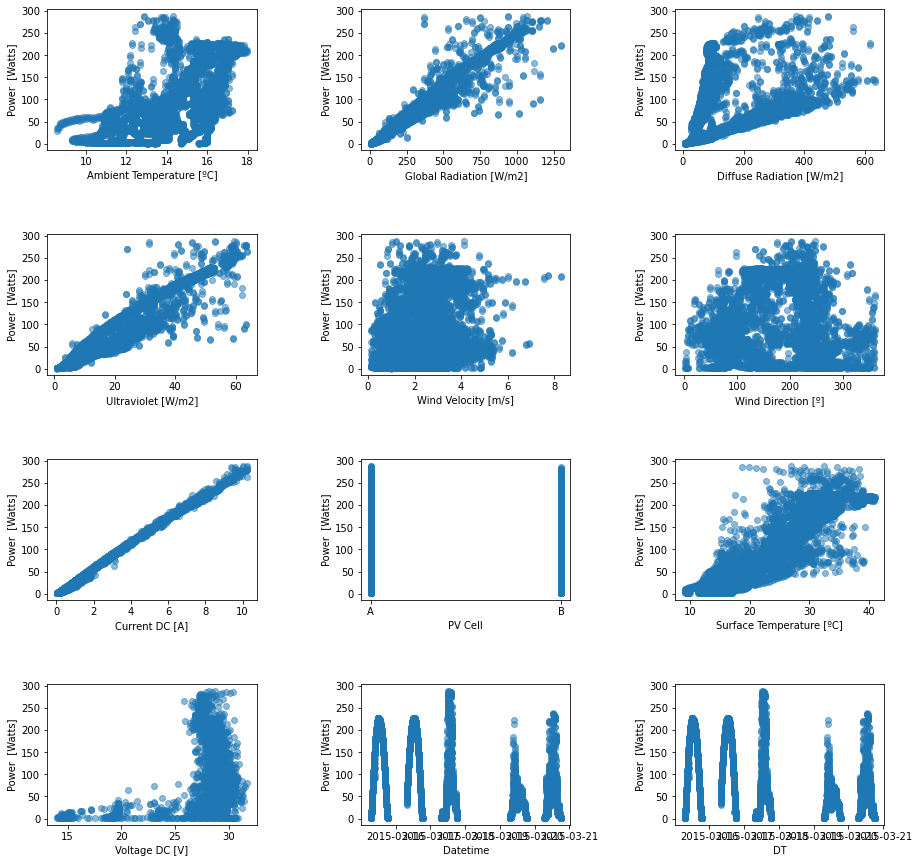

In [134]:
scatterplots_week(features, ncol=3, figsize=(15, 15))

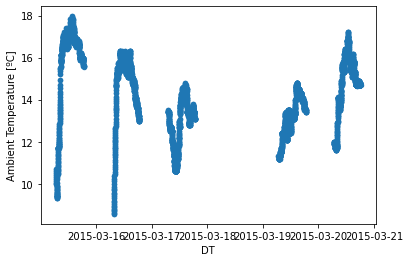

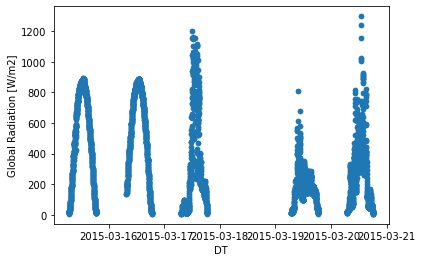

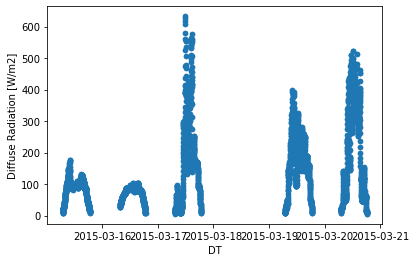

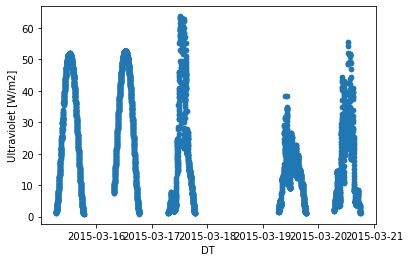

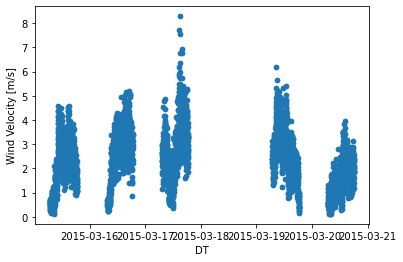

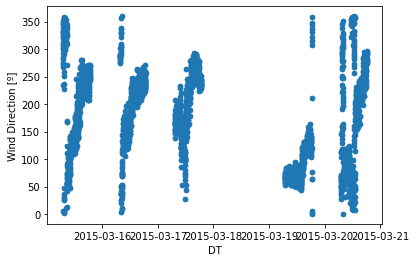

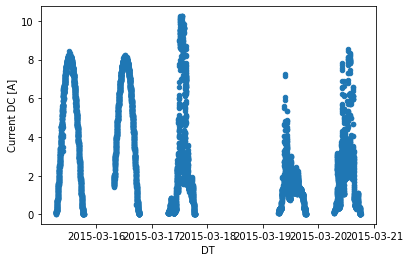

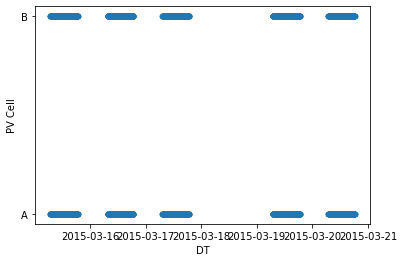

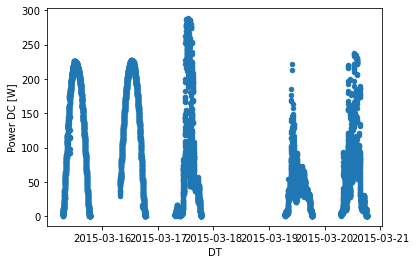

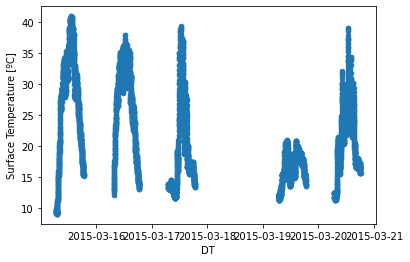

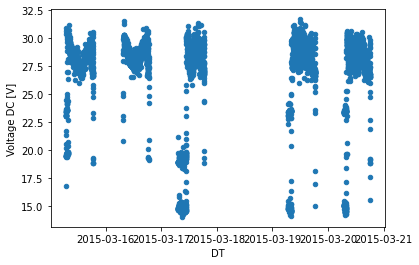

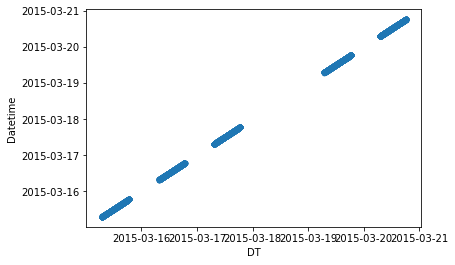

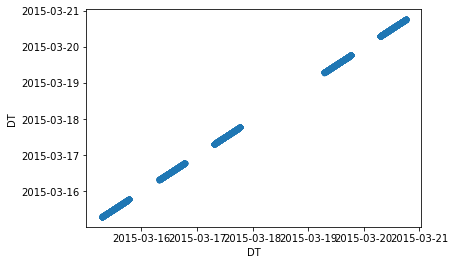

In [102]:
for i in df_week.columns:
    df_week.plot.scatter(x='DT', y = i)

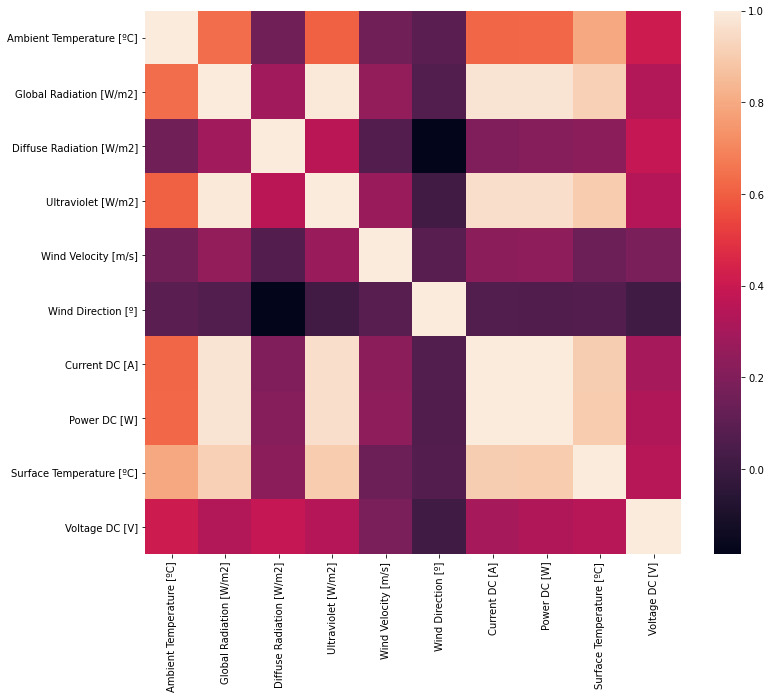

In [135]:
#I know this is above; I just wanted a quick reminder. 
plt.subplots(figsize=(12,10))
sns.heatmap(df_week.corr());

In [127]:
mask_day = (df_dt['DT'] >='2014-05-01') & (df['DT'] <='2014-05-02')

The results for the week mask are much more clear than the total. Global radiation and ultraviolet are highly correlated. 

Now looking at day: 

In [136]:
df_day = df_dt.loc[mask_day]

In [137]:
df_day.describe()

,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],Current DC [A],Power DC [W],Surface Temperature [ºC],Voltage DC [V]
count,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000
mean,14.213669,204.294405,92.541692,11.865474,1.196603,206.301601,4.192543,112.706987,33.545058,26.317618
std,2.999473,195.512756,85.421371,10.453322,0.793204,85.364857,2.756778,72.949860,10.560927,3.075013
min,9.100000,1.085395,1.608552,0.501523,0.083333,0.418304,0.010000,0.292000,14.300000,14.150000
25%,11.233334,2.854308,2.831453,0.556670,0.500000,139.332400,1.382500,37.675125,27.000000,26.200000
50%,15.500000,183.695080,85.671104,11.059930,1.083333,216.218080,4.622500,129.667500,34.600000,27.050000
75%,16.900000,356.418320,155.203000,20.447556,1.800000,277.501220,6.885000,183.896250,41.800000,27.850000
max,17.600000,708.652000,356.632800,33.461514,3.866667,359.794240,7.905000,203.747000,53.100000,30.800000


In [138]:
df_day.nunique()

Ambient Temperature [ºC]     244
Global Radiation [W/m2]      819
Diffuse Radiation [W/m2]     818
Ultraviolet [W/m2]           803
Wind Velocity [m/s]          187
Wind Direction [º]           819
Current DC [A]              1159
PV Cell                        2
Power DC [W]                1573
Surface Temperature [ºC]     371
Voltage DC [V]               153
Datetime                     819
DT                           819
dtype: int64

In [139]:
discard = ['Power DC [W]']
features = [i for i in df_day.columns if i not in discard]

In [140]:
def scatterplots_day(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'Power DC [W]', data=df_day, alpha=0.5)
        ax.set(xlabel=col, ylabel='Power  [Watts]')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

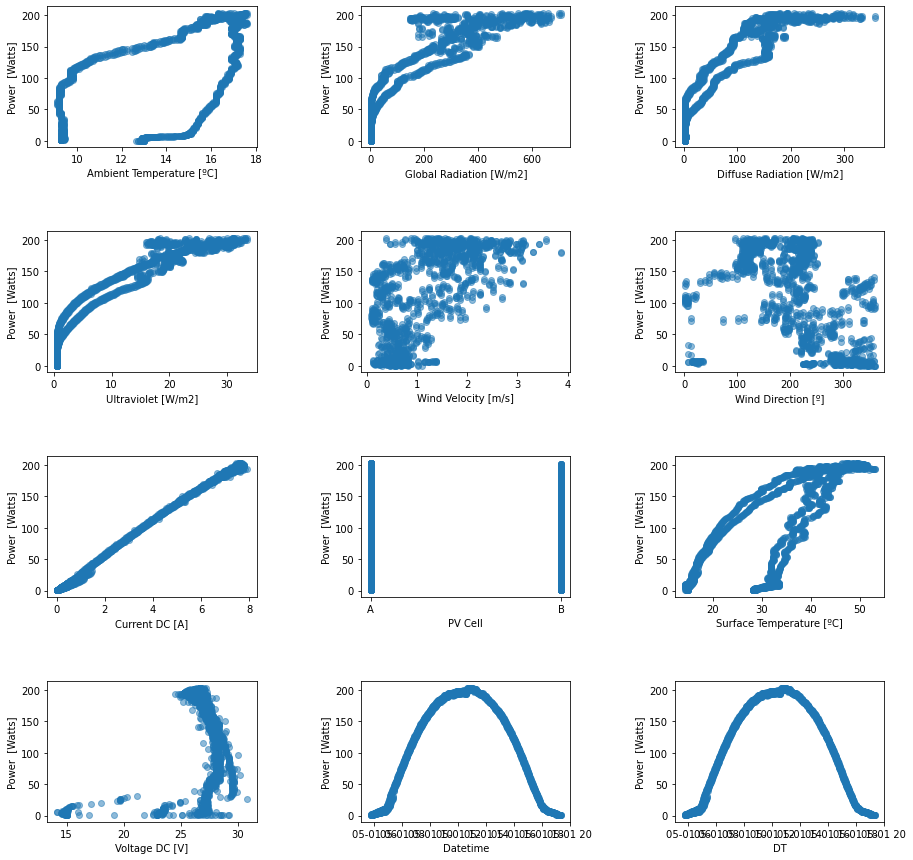

In [143]:
scatterplots_day(features, ncol=3, figsize=(15, 15))

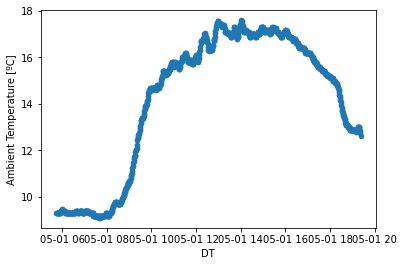

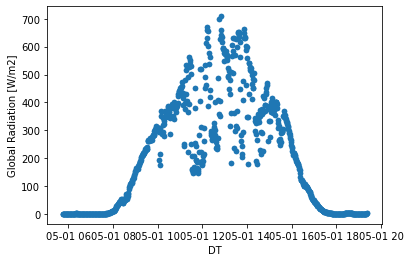

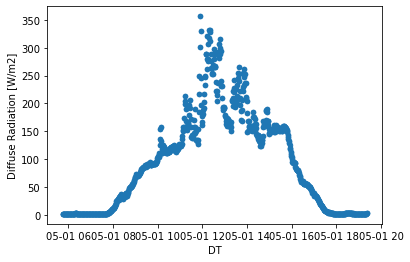

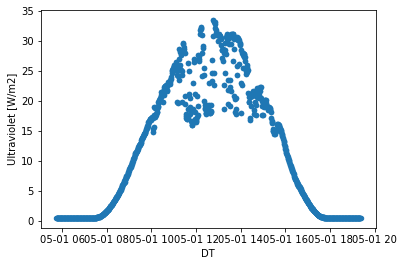

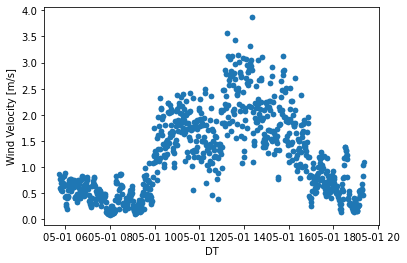

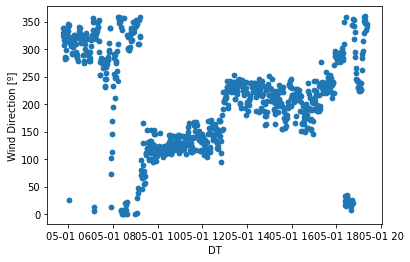

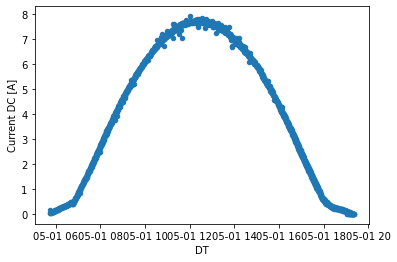

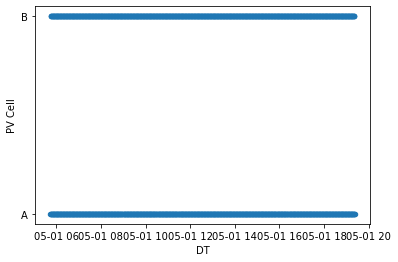

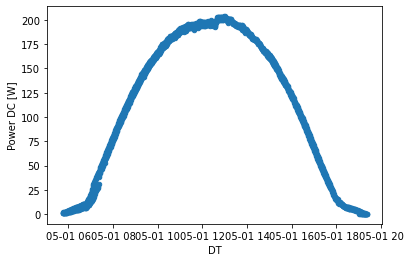

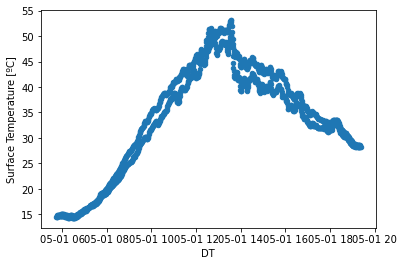

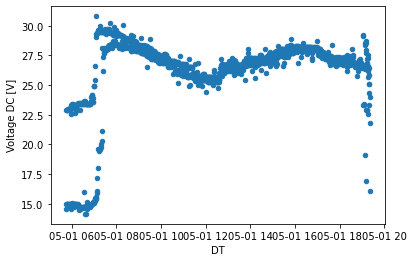

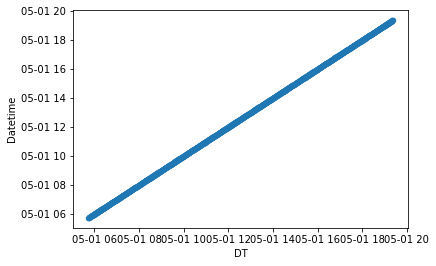

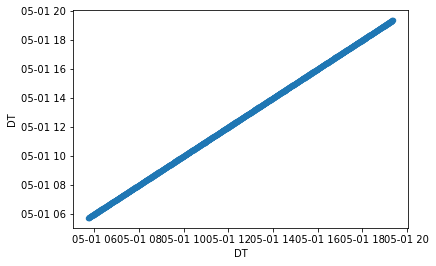

In [144]:
for i in df_day.columns:
    df_day.plot.scatter(x='DT', y = i)

Ready for model building. Will have to play with how to predict in that step. May remove some features (surface temp of the PV cell and current/voltage) for a full dependence on weather station data. 